In [1]:
!pip install intake intake-esm xarray zarr gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.8 MB/s eta 0:00:00


In [2]:
import intake
import xarray as xr

# Load the Pangeo CMIP6 cloud data catalog
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_catalog(col_url)

# See what experiments/models are available
print(list(col))

[]


In [3]:
import intake

col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)

col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [4]:
import numpy as np
np.sum(col.df['activity_id']=='AerChemMIP')

np.int64(8576)

In [5]:
df_ = col.df[col.df['activity_id']=='AerChemMIP']

In [6]:
df_['source_id'].unique()

array(['GFDL-ESM4', 'CNRM-ESM2-1', 'CESM2-WACCM', 'BCC-ESM1',
       'MPI-ESM-1-2-HAM', 'MIROC6', 'UKESM1-0-LL', 'NorESM2-LM',
       'GISS-E2-1-G', 'MRI-ESM2-0', 'TaiESM1', 'EC-Earth3-AerChem'],
      dtype=object)

In [7]:
df_['experiment_id'].unique()

array(['hist-piAer', 'histSST-1950HC', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'hist-piNTCF', 'histSST-piNTCF', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'ssp370SST-lowCH4', 'piClim-VOC', 'ssp370-lowNTCF',
       'piClim-control', 'piClim-aer', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'histSST-piCH4', 'piClim-BC', 'piClim-2xfire', 'piClim-SO2',
       'piClim-OC', 'piClim-N2O', 'piClim-2xDMS', 'ssp370'], dtype=object)

In [8]:
df_['table_id'].unique()

array(['AERmon', 'CFmon', 'Amon', 'Emon', 'fx', 'Lmon', 'day', 'LImon',
       '3hr', 'AERday', 'CFday', 'AERmonZ', 'EdayZ', 'Omon', 'EmonZ',
       'SImon'], dtype=object)

In [9]:
df_['member_id'].unique()

array(['r1i1p1f1', 'r1i1p1f2', 'r1i2p1f1', 'r2i1p1f1', 'r3i1p1f1',
       'r2i1p1f2', 'r3i1p1f2', 'r1i1p3f1', 'r5i1p1f1', 'r3i2p1f1',
       'r2i2p1f1', 'r1i1p1f4', 'r4i1p1f1'], dtype=object)

In [10]:
df_['variable_id'].unique()

array(['dryoa', 'cdnc', 'rsdcs', 'rsd', 'ps', 'zg', 'wap', 'vas', 'va',
       'uas', 'ua', 'ts', 'tauv', 'tauu', 'tasmin', 'tasmax', 'tas', 'ta',
       'rsucs', 'fFireNat', 'fLuc', 'fProductDecomp', 'fracLut', 'gppLut',
       'hflsLut', 'rsu', 'hfssLut', 'laiLut', 'loaddust', 'loadso4',
       'cSoil', 'sfcWind', 'hussLut', 'fAnthDisturb', 'ec550aer', 'co2s',
       'rlus', 'rlds', 'psl', 'prw', 'prsn', 'prc', 'pr', 'o3', 'rldscs',
       'ch4', 'mrlso', 'mrsfl', 'airmass', 'abs550aer', 'sftlf', 'sftgif',
       'aoanh', 'mrso', 'mrsos', 'prveg', 'tran', 'mrro', 'loadss', 'snw',
       'tslsi', 'areacella', 'mrsofc', 'orog', 'rlut', 'rlutcs', 'rsds',
       'co2mass', 'evspsbl', 'hcfc22global', 'hfls', 'hfss', 'hur', 'co2',
       'hurs', 'rsutcs', 'rtmt', 'sci', 'cLand', 'cldnvi', 'co23D', 'hus',
       'concdust', 'clwvi', 'clt', 'rsdscs', 'rsdt', 'rsus', 'rsuscs',
       'rsut', 'n2oglobal', 'clw', 'n2o', 'huss', 'ch4global', 'ci', 'cl',
       'cli', 'clivi', 'mc', 'mrros', 'bld

In [11]:
vars = ['rsucs', 'rsdcs', 'rsds', 'rsdscs', 'rsus', 'rsuscs', 'rlus', 'rlds', 'rldscs']

In [12]:
exps = ['piClim-aer', 'piClim-2xdust', 'piClim-control']
exps = ['piClim-2xdust']

In [13]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]

<ipython-input-13-44ad2f598b18>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
54054,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54055,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54100,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54126,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219


In [14]:
query = dict(
    experiment_id=["piClim-2xdust"],
    variable_id=['rsds', 'rsus', 'rlus', 'rlds'],
    source_id=['CNRM-ESM2-1'],
    table_id=['Amon'],
    member_id='r1i1p1f2'
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,4
grid_label,1
zstore,4
dcpp_init_year,0


In [15]:
# Load the dataset with anonymous access

dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [16]:
# Pick the dataset
ds_dust = list(dset_dict.values())[0]

In [17]:
ds_dust

<xarray.Dataset> Size: 189MB
Dimensions:         (lat: 128, lon: 256, member_id: 1, dcpp_init_year: 1,
                     time: 360, axis_nbounds: 2)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) datetime64[ns] 3kB 1850-01-16T12:00:00 ... 1879-12...
    time_bounds     (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: axis_nbounds
Data variables:
    rlus            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rlds            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rsus            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rsds            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
Attributes: (12/60)
    CMIP6_CV_version:                 cv=6.2.3.0-7-g2019642
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            CNRM-ESM2-1_piClim-2xdust_r1i1p1f2
    activity_id:                      AerChemMIP
    arpege_minor_version:             6.3.2
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f2
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190219
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.piC...

# Control

In [55]:
df_ = col.df[col.df['activity_id']=='CMIP']

In [56]:
import numpy as np
np.sum(col.df['activity_id']=='CMIP')

np.int64(134576)

In [57]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)]

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
40633,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40634,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40637,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40639,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40753,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,day,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
...,...,...,...,...,...,...,...,...,...,...,...
441156,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441218,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441228,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441229,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529


In [58]:
df_cnrmesm['experiment_id'].unique()

array(['piControl-spinup', '1pctCO2', 'esm-piControl-spinup',
       'abrupt-4xCO2', 'piControl', 'amip', 'historical', 'esm-piControl',
       'esm-hist'], dtype=object)

In [59]:
exps = ['piClim-aer', 'piClim-2xdust', 'piClim-control']
exps = ['piControl']

In [60]:
vars = ['rsds', 'rsus', 'rlus', 'rlds']

In [61]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']

<ipython-input-61-18eae888119e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']
<ipython-input-61-18eae888119e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
42671,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42690,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42694,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42696,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115


In [62]:
query = dict(
    experiment_id=["piControl"],
    variable_id=['rsds', 'rsus', 'rlus', 'rlds'],
    source_id=['CNRM-ESM2-1'],
    table_id=['Amon'],
    member_id='r1i1p1f2'
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,4
grid_label,1
zstore,4
dcpp_init_year,0


In [63]:
# Load the dataset with anonymous access

dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warnin

In [64]:
# Pick the dataset
ds_piclim = list(dset_dict.values())[0]

In [65]:
ds_piclim

<xarray.Dataset> Size: 3GB
Dimensions:         (lat: 128, lon: 256, member_id: 1, dcpp_init_year: 1,
                     time: 6000)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) object 48kB 1850-01-16 00:00:00 ... 2349-12-16 00:...
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Data variables:
    rsus            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rlus            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rsds            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rlds            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
Attributes: (12/61)
    CMIP6_CV_version:                 cv=6.2.3.0-7-g2019642
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            CNRM-ESM2-1_piControl_r1i1p1f2
    activity_id:                      CMIP
    arpege_minor_version:             6.3.1
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f2
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20181115
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl...

# Radiative forcing due to control

In [52]:
ds_rad_piclim = (ds_piclim.rsds + ds_piclim.rlds - ds_piclim.rsus - ds_piclim.rlus).mean(dim='time').compute()
ds_rad_piclim

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.381878 , -16.381878 , -16.381878 , ..., -16.381878 ,
          -16.381878 , -16.381878 ],
         [-20.540508 , -20.540508 , -20.540508 , ..., -20.540508 ,
          -20.540508 , -20.540508 ],
         [-20.051147 , -20.051147 , -20.051147 , ..., -19.815842 ,
          -20.051147 , -20.051147 ],
         ...,
         [ -2.4818604,  -2.4818604,  -2.4818604, ...,  -3.113703 ,
           -2.4818604,  -2.4818604],
         [ -2.0296535,  -2.0296535,  -2.0296535, ...,  -2.0296535,
           -2.0296535,  -2.0296535],
         [ -6.9580455,  -6.9580455,  -6.9580455, ...,  -6.9580455,
           -6.9580455,  -6.9580455]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

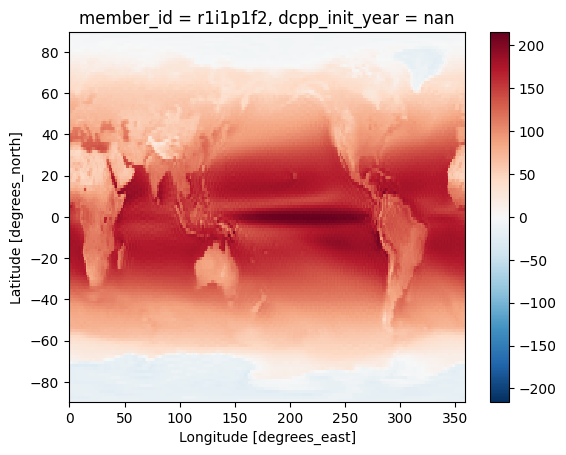

In [53]:
ds_rad_piclim.plot()

In [36]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.3 MB/s eta 0:00:00


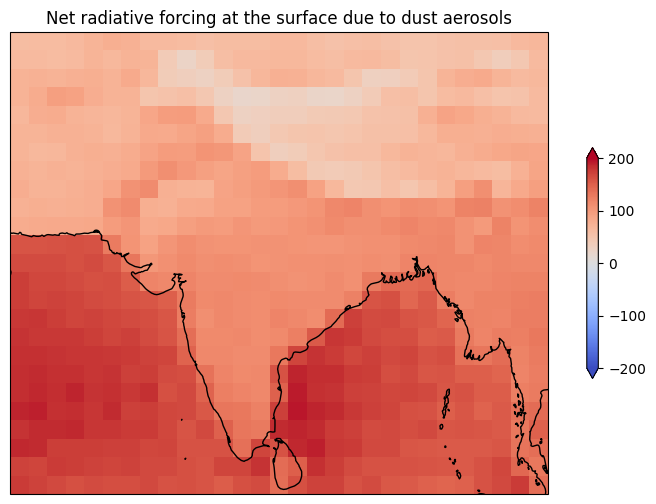

In [54]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = ds_rad_piclim  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-200, vmax=200, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()

In [45]:
data

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.381878 , -16.381878 , -16.381878 , ..., -16.381878 ,
          -16.381878 , -16.381878 ],
         [-20.540508 , -20.540508 , -20.540508 , ..., -20.540508 ,
          -20.540508 , -20.540508 ],
         [-20.051147 , -20.051147 , -20.051147 , ..., -19.815842 ,
          -20.051147 , -20.051147 ],
         ...,
         [ -2.4818604,  -2.4818604,  -2.4818604, ...,  -3.113703 ,
           -2.4818604,  -2.4818604],
         [ -2.0296535,  -2.0296535,  -2.0296535, ...,  -2.0296535,
           -2.0296535,  -2.0296535],
         [ -6.9580455,  -6.9580455,  -6.9580455, ...,  -6.9580455,
           -6.9580455,  -6.9580455]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

# Radiative forcing in control

In [66]:
ds_dust_piclim = (ds_dust.rsds + ds_dust.rlds - ds_dust.rsus - ds_dust.rlus).mean(dim='time').compute()
ds_dust_piclim

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.36825  , -16.36825  , -16.36825  , ..., -16.36825  ,
          -16.36825  , -16.36825  ],
         [-20.688906 , -20.688906 , -20.688906 , ..., -20.688906 ,
          -20.688906 , -20.688906 ],
         [-19.944105 , -19.944105 , -19.944105 , ..., -19.724257 ,
          -19.944105 , -19.944105 ],
         ...,
         [ -3.0276732,  -3.0276732,  -3.0276732, ...,  -3.6959343,
           -3.0276732,  -3.0276732],
         [ -2.813423 ,  -2.813423 ,  -2.813423 , ...,  -2.813423 ,
           -2.813423 ,  -2.813423 ],
         [ -5.296227 ,  -5.296227 ,  -5.296227 , ...,  -5.296227 ,
           -5.296227 ,  -5.296227 ]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

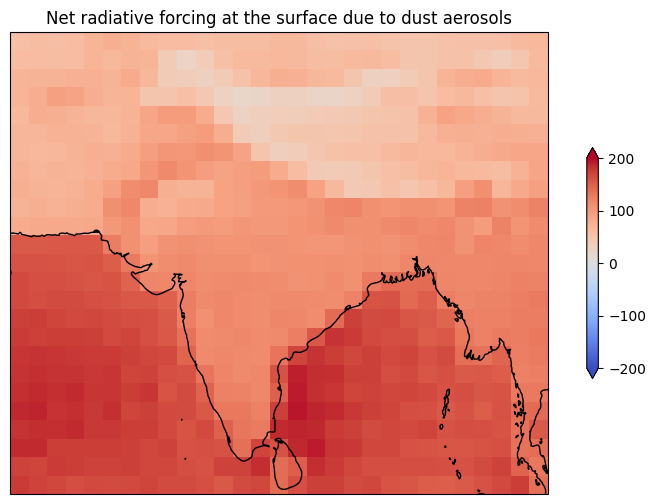

In [67]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = ds_dust_piclim  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-200, vmax=200, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()

In [68]:
dust_net_rad = ds_dust_piclim - ds_rad_piclim

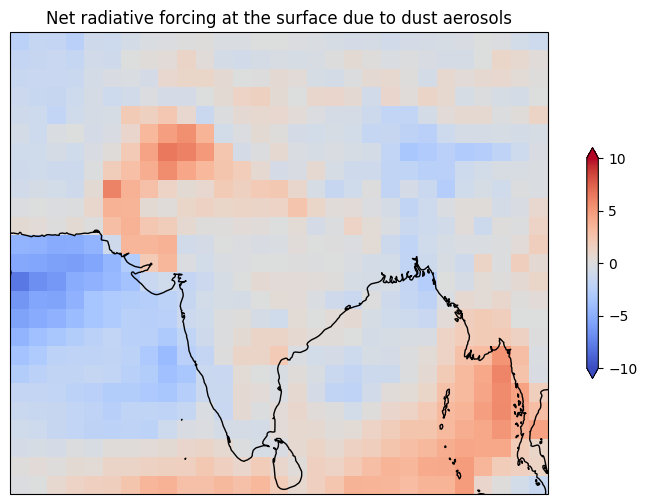

In [70]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = dust_net_rad  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-10, vmax=10, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()